# Distributions of Data

In [1]:
import numpy as np
from scipy.stats import (
    skewnorm,
    expon,
    norm,
    uniform,
    lognorm,
    skew as skew_calc
)
import matplotlib.pyplot as plt

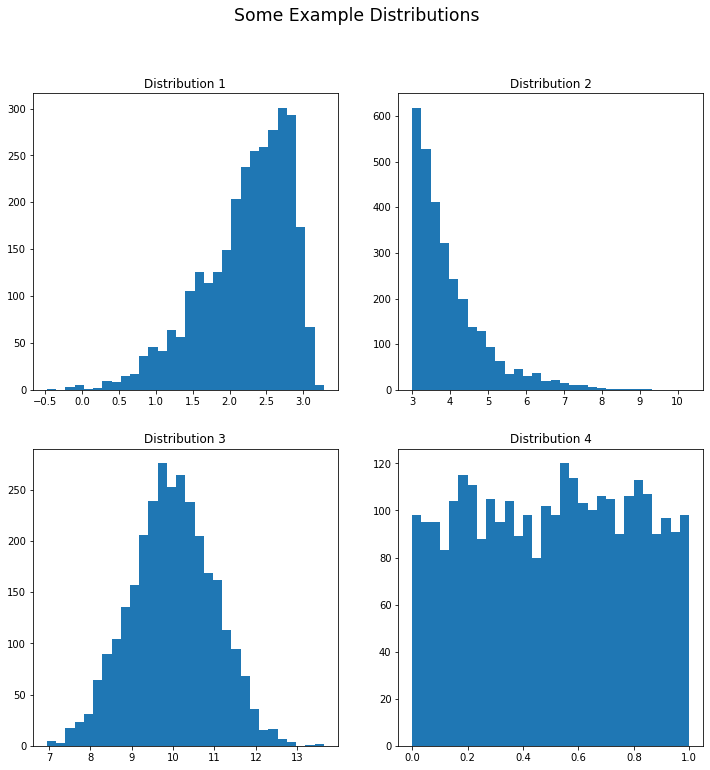

In [2]:
skew = -skewnorm.rvs(10, size=3000) + 3
exp = expon.rvs(3, size=3000)
normal = norm.rvs(10, size=3000)
uni = uniform.rvs(0, size=3000)

fig, ax = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Some Example Distributions', fontsize='xx-large')
ax[0,0].hist(skew, bins=30)
ax[0,0].set_title('Distribution 1')
ax[0,1].hist(exp, bins=30)
ax[0,1].set_title('Distribution 2')
ax[1,0].hist(normal, bins=30)
ax[1,0].set_title('Distribution 3')
ax[1,1].hist(uni, bins=30)
ax[1,1].set_title('Distribution 4');

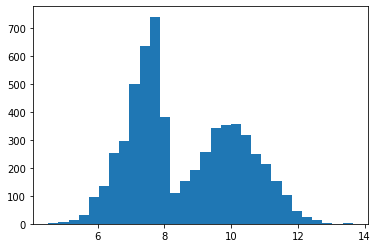

In [3]:
plt.hist(np.concatenate([skew + 5, normal]), bins=30);
plt.savefig('multi_modal.png', dpi=300)

## Mode, Median, & Mean

In [4]:
# sample code to calculate mode
from scipy.stats import mode

m = mode([1,2,3,4,4,4,5,5])
# note mode returns an array 
# because there could be more than one mode
print(
    f"The mode is {m.mode[0]} with a count of"
    f" {m.count[0]} instances"
)

The mode is 4 with a count of 3 instances


In [5]:
# sample code to calculate median
import numpy as np

values = [85, 99, 70, 71, 86, 88, 94, 105]
median = np.median(values)
print(f"The mean value is {median:.2f}")

The mean value is 87.00


In [6]:
# sample code to calculate mean
import numpy as np

values = [85, 99, 70, 71, 86, 88, 94]
mean = np.mean(values)
print(f"The mean value is {mean:.1f}")

The mean value is 84.7


## Impact on Mean

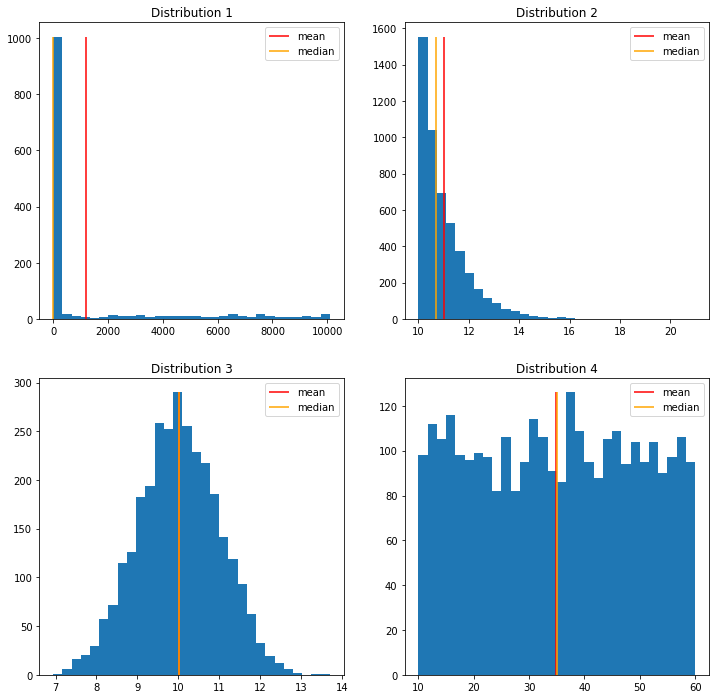

In [7]:
skew = np.concatenate(
    [
        lognorm.rvs(.3, scale=5, size=1000),
        uniform.rvs(100, 10000, size=300)
    ]
)
exp = expon.rvs(10, size=5000)
normal = norm.rvs(10, size=3000)
uni = uniform.rvs(10, 50, size=3000)

fig, ax = plt.subplots(2,2, figsize=(12,12))

mag, *_ = ax[0,0].hist(skew, bins=30)
ax[0,0].set_title('Distribution 1')
ax[0,0].vlines(np.mean(skew),0, max(mag), colors='red', label='mean')
ax[0,0].vlines(np.median(skew), 0, max(mag), colors='orange', label='median')
ax[0,0].legend()

mag, *_ = ax[0,1].hist(exp, bins=30)
ax[0,1].set_title('Distribution 2')
ax[0,1].vlines(np.mean(exp),0, max(mag), colors='red', label='mean')
ax[0,1].vlines(np.median(exp), 0, max(mag), colors='orange', label='median')
ax[0,1].legend()

mag, *_ = ax[1,0].hist(normal, bins=30)
ax[1,0].set_title('Distribution 3')
ax[1,0].vlines(np.mean(normal),0, max(mag), colors='red', label='mean')
ax[1,0].vlines(np.median(normal), 0, max(mag), colors='orange', label='median')
ax[1,0].legend()

mag, *_ = ax[1,1].hist(uni, bins=30)
ax[1,1].set_title('Distribution 4');
ax[1,1].vlines(np.mean(uni),0, max(mag), colors='red', label='mean')
ax[1,1].vlines(np.median(uni), 0, max(mag), colors='orange', label='median')
ax[1,1].legend();

## Min, Max, & Range

In [8]:
# sample code for min, max, and range
import numpy as np

values = [85, 99, 70, 71, 86, 88, 94, 105]
max_value = np.max(values)
min_value = np.min(values)
range_ = max_value - min_value
print(f"The data have a range of {range_}"
      f" with max of {max_value}" 
      f" and min of {min_value}")

The data have a range of 35 with max of 105 and min of 70


## Quartiles and IQR

In [9]:
# sample code for quartiles and IQR
import numpy as np
from scipy import stats

values = [85, 99, 70, 71, 86, 88, 94]
quartiles = np.quantile(
    values, 
    [0.25, 0.5, 0.75],
    method="closest_observation"
)
print(f"The quartiles are"
      f" Q1: {quartiles[0]},"
      f" Q2: {quartiles[1]},"
      f" Q3: {quartiles[2]}"
)

iqr = stats.iqr(values, interpolation='closest_observation')
print(f"The interquartile range is {iqr}")


The quartiles are Q1: 71, Q2: 85, Q3: 88
The interquartile range is 17


## Box Plots

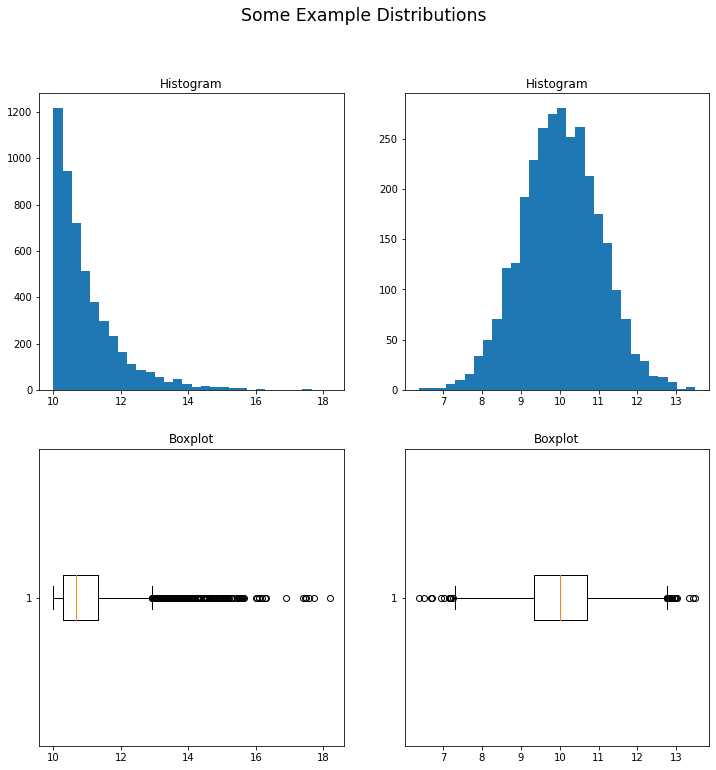

In [10]:
exp = expon.rvs(10, size=5000)
normal = norm.rvs(10, size=3000)

fig, ax = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Some Example Distributions', fontsize='xx-large')
mag, *_ = ax[0,0].hist(exp, bins=30)
ax[0,0].set_title('Histogram')
mag, *_ = ax[1,0].boxplot(exp, vert=False)
ax[1,0].set_title('Boxplot')
mag, *_ = ax[0,1].hist(normal, bins = 30)
ax[0,1].set_title('Histogram')
mag, *_ = ax[1,1].boxplot(normal, vert=False)
ax[1,1].set_title('Boxplot');

## Tukey Fences

In [11]:
# sample code for tukey fences
import numpy as np
from scipy import stats

# tukey fences use a multiplier
fence_multiplier = 1.5

# generate some data to work with
values = stats.norm.rvs(10, size=3000)

# calculate q1 and q3 quartiles only
q1, q3 = np.quantile(
    values, [.25, .75],
    method='closest_observation'
)

iqr = stats.iqr(
    values,
    interpolation='closest_observation'
)

# calculate fences
lower_fence = q1 - iqr * fence_multiplier
upper_fence = q3 + iqr * fence_multiplier

# may vary due to randomness in data generation
print(f"The lower fence is {lower_fence:.2f}"
      f" and the upper fence is {upper_fence:.2f}"
)

The lower fence is 7.26 and the upper fence is 12.73


## Variance and Standard Deviation

In [12]:
# sample code for variance and 
# standard deviation
import numpy as np

values = [85, 99, 70, 71, 86, 88, 94]
variance = np.var(values)
standard_dev = np.std(values)

print(f"The variance is {variance:.2f}"
      " and the standard deviation is"
      f" {standard_dev:.2f}"
)

The variance is 101.06 and the standard deviation is 10.05


## Skewness

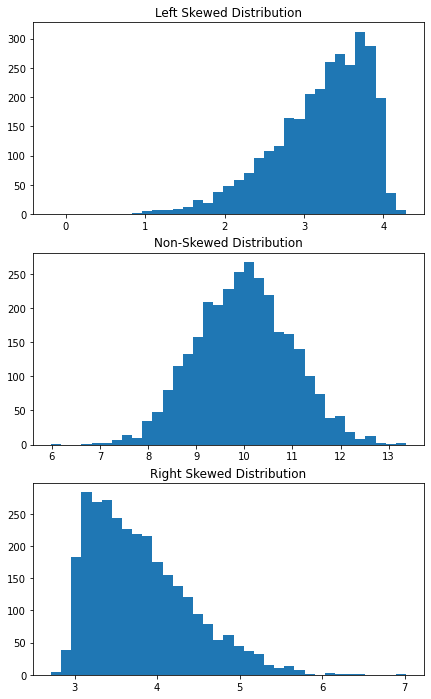

In [13]:
skew_left = -skewnorm.rvs(10, size=3000) + 4
skew_right = skewnorm.rvs(10, size=3000) + 3
symmetric = norm.rvs(10, size=3000)

fig, ax = plt.subplots(3,1, figsize=(7,12))
ax[0].hist(skew_left, bins=35)
ax[0].set_title('Left Skewed Distribution')
ax[1].hist(symmetric, bins=35)
ax[1].set_title('Non-Skewed Distribution')
ax[2].hist(skew_right, bins=35)
ax[2].set_title('Right Skewed Distribution');
fig.savefig('skewness',dpi=300)

In [14]:
# distributions for generating data
from scipy.stats import skewnorm, norm
# function for calculating skewness
from scipy.stats import skew as skew_calc

# generate data
skew_left = -skewnorm.rvs(10, size=3000) + 4
skew_right = skewnorm.rvs(10, size=3000) + 3
symmetric = norm.rvs(10, size=3000)

# calculate skewness
skew_left_value = skew_calc(skew_left)
skew_right_value = skew_calc(skew_right)
symmetric_value = skew_calc(symmetric)

# Output may vary some due to randomness of generated data
print(
    "The skewness value of this left skewed distribution is"
    f" {skew_left_value:.3f}")
print(
    "The skewness value of this right skewed distribution is"
    f" {skew_right_value:.3f}")
print(
    "The skewness value of this symmetric distribution is"
    f" {symmetric_value:.3f}")

The skewness value of this left skewed distribution is -0.953
The skewness value of this right skewed distribution is 0.956
The skewness value of this symmetric distribution is 0.046


## Kurtosis

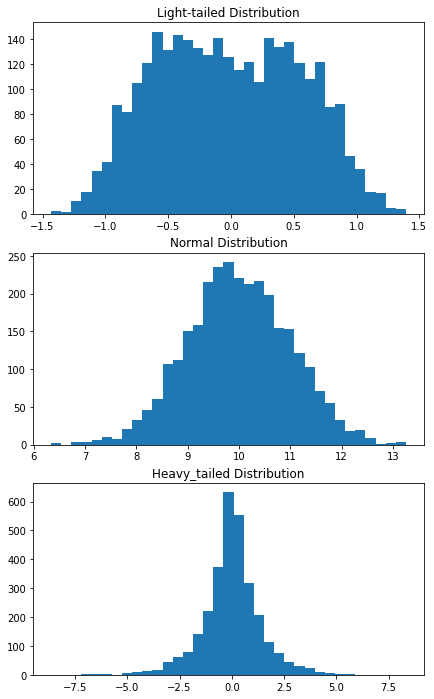

In [15]:
# distributions for generating data
from scipy.stats import gennorm
# function for calculating skewness
from scipy.stats import kurtosis

light_tailed = gennorm.rvs(5, size=3000)
symmetric = norm.rvs(10, size=3000)
heavy_tailed_ = gennorm.rvs(1, size=3000)

fig, ax = plt.subplots(3,1, figsize=(7, 12))

ax[0].hist(light_tailed, bins=35)
ax[0].set_title('Light-tailed Distribution')
ax[1].hist(symmetric, bins=35)
ax[1].set_title('Normal Distribution')
ax[2].hist(heavy_tailed_, bins=35)
ax[2].set_title('Heavy_tailed Distribution');
fig.savefig('kurtosis',dpi=300)

In [16]:
# distributions for generating data
from scipy.stats import gennorm
# function for calculating skewness
from scipy.stats import kurtosis

# generate data
light_tailed = gennorm.rvs(5, size=3000)
symmetric = norm.rvs(10, size=3000)
heavy_tailed = gennorm.rvs(1, size=3000)

# calculate skewness
light_tailed_value = kurtosis(light_tailed)
heavy_tailed_value = kurtosis(heavy_tailed)
symmetric_value = kurtosis(symmetric)

# Output may vary some due to randomness of generated data
print(
    "The kurtosis value of this light-tailed distribution is"
    f" {light_tailed_value:.3f}"
)
print(
    "The kurtosis value of this heavy_tailed distribution is"
    f" {heavy_tailed_value:.3f}"
)
print(
    "The kurtosis value of this normal distribution is"
    f" {symmetric_value:.3f}"
)

The kurtosis value of this light-tailed distribution is -0.954
The kurtosis value of this heavy_tailed distribution is 2.348
The kurtosis value of this normal distribution is 0.036


## Describing with Pandas

In [17]:
# use pandas for dataframe
import pandas as pd

# some random values
data = pd.DataFrame(
    [
        [3, 25, 26, 0.3],
        [5, 0.45, 16, 46],
        [15, 8, 99, -6],
        [-0.7, 4, 14, 5],
        [2, -.3, 0.4, 3],
        [3, 4, 9, 10]
    ]
)

data.describe()

0          1          2          3
count   6.00000   6.000000   6.000000   6.000000
mean    4.55000   6.858333  27.400000   9.716667
std     5.44564   9.370935  36.071041  18.545125
min    -0.70000  -0.300000   0.400000  -6.000000
25%     2.25000   1.337500  10.250000   0.975000
50%     3.00000   4.000000  15.000000   4.000000
75%     4.50000   7.000000  23.500000   8.750000
max    15.00000  25.000000  99.000000  46.000000

## Anscombe’s Quartet

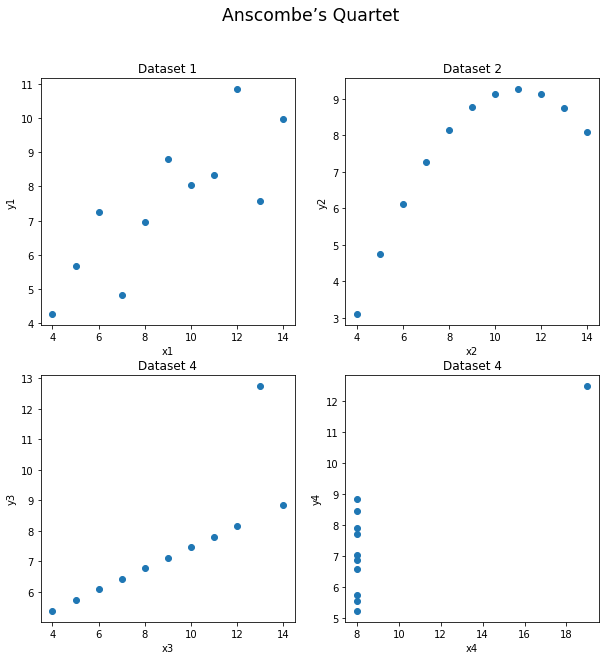

In [18]:
quartet = pd.read_csv("./data/anscombe.csv")

fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle("Anscombe’s Quartet", size='xx-large')

ax[0, 0].scatter(quartet.x1, quartet.y1)
ax[0, 0].set_xlabel('x1')
ax[0, 0].set_ylabel('y1')
ax[0, 0].set_title('Dataset 1')

ax[0, 1].scatter(quartet.x2, quartet.y2)
ax[0, 1].set_xlabel('x2')
ax[0, 1].set_ylabel('y2')
ax[0, 1].set_title('Dataset 2')

ax[1, 0].scatter(quartet.x3, quartet.y3)
ax[1, 0].set_xlabel('x3')
ax[1, 0].set_ylabel('y3')
ax[1, 0].set_title('Dataset 4')

ax[1, 1].scatter(quartet.x4, quartet.y4)
ax[1, 1].set_xlabel('x4')
ax[1, 1].set_ylabel('y4')
ax[1, 1].set_title('Dataset 4');

In [19]:
quartet.head()

x1  x2  x3  x4    y1    y2     y3    y4
0  10  10  10   8  8.04  9.14   7.46  6.58
1   8   8   8   8  6.95  8.14   6.77  5.76
2  13  13  13   8  7.58  8.74  12.74  7.71
3   9   9   9   8  8.81  8.77   7.11  8.84
4  11  11  11   8  8.33  9.26   7.81  8.47